## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [ ]:
# Q1.1:
df = pd.read_csv('USA_cars_datasets.csv')
df = df.loc[:,['price','year','mileage'] ] # removing every variable put price, yer, mileage
print(df.shape) #df.shape tells us that there are 2499 rows.
print(df.describe()) #df.describe tells us there are 2499 observations.

# Since there are 2499 rows and 2499 observations, there are no nans to handle.
df.head()

(2499, 3)
              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [ ]:
# Q1.2:
# We can create a function that will maxmin our input variable to make it reusable for any variable
def maxmin(variable):
    return ((variable - min(variable)) / (max(variable) - min(variable)))

# Then, we call the maxmin function on the year and mileage variable to maxmin normalize them.
df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])


In [ ]:
# Q1.3:
y = df['price'] # We define X and Y as our price and dropped variable, then use the train_test_split function to spkit it up into 80/20
X = df.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

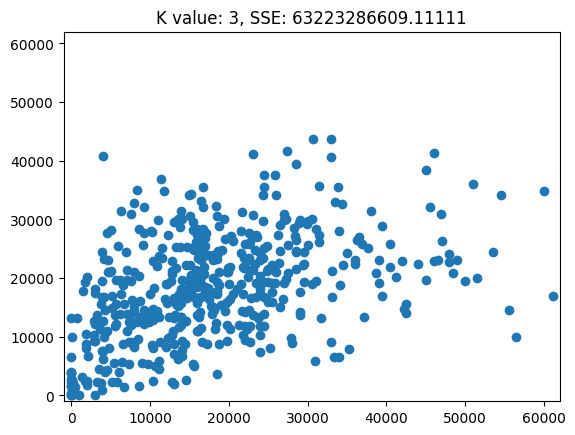

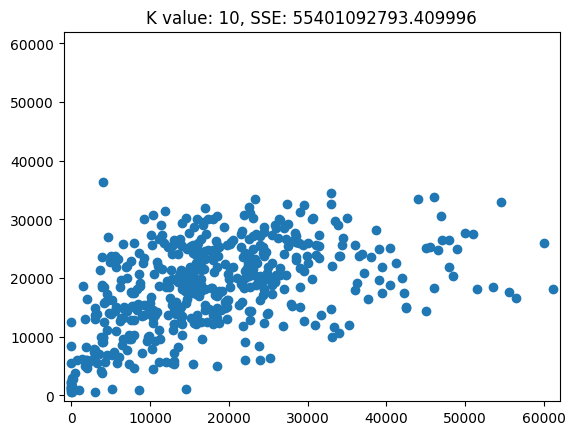

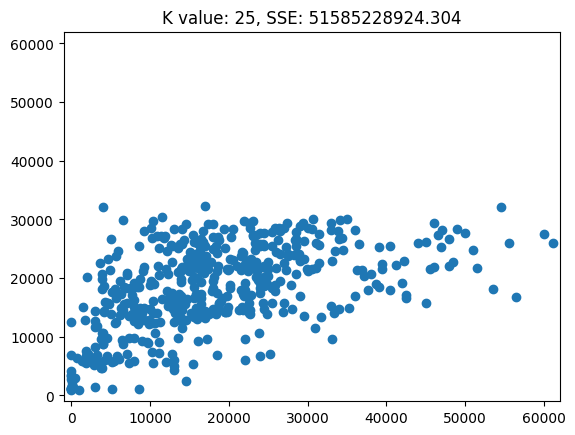

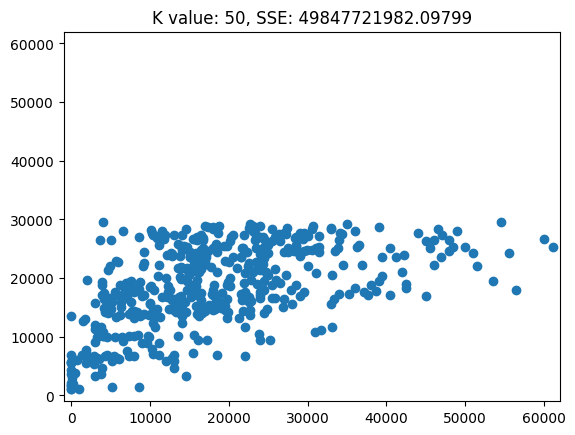

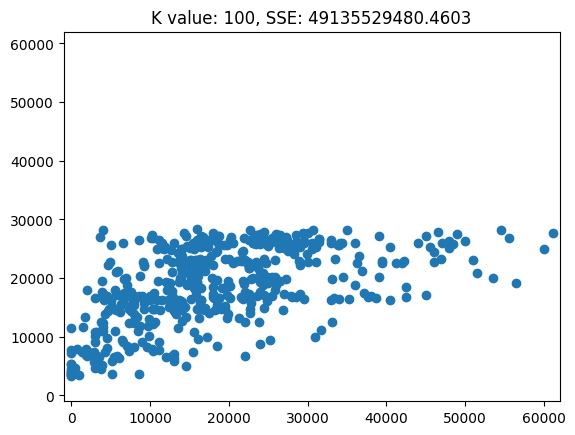

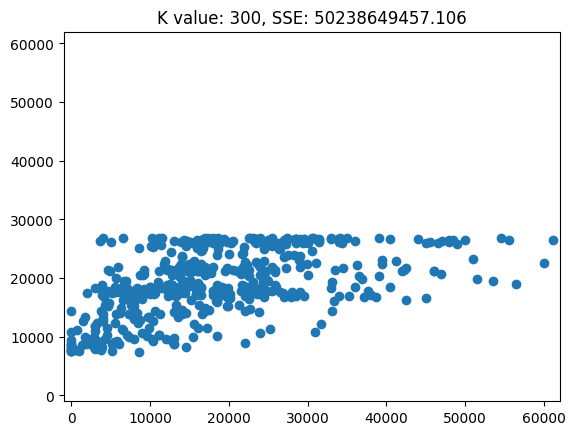

In [ ]:
# Q1.4:
# We will loop through a list containing the k values we want to use, make the model, and plot it.
k_values = [3, 10, 25, 50, 100, 300]
for k in k_values:
  # put x_train and y_train into the neighbors regresser model, and create the y_hat and SSE.
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_hat = model.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )

    # Create the scatterplots
    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('K value: '+str(k)+', SSE: '+str(SSE))
    axes.set_ylim(-1000, 62000) # set the y and x axis limiters to make plots more viewable
    axes.set_xlim(-1000, 62000)
    plt.show()

As our K value increases, the test value vs predicted value seems to go down, almost flatlining with a max around 27k for the k value of 300. Also, the SSE tends to get lower and lower, only slightly increasing from k=100 to k=300. The values are only decreasing along the y-axis though, they stay consistent with their position along the x-axis.

[77]


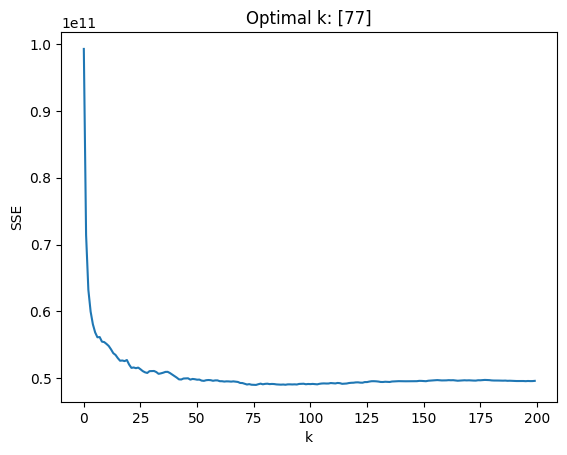

In [ ]:
# Q1.5:
# To determine the optimal k, we will set a bar first. We will then make a grid from 1 to k_bar,
# which will be the range of k we will consider. (grid from 1-200 in this case.)
k_bar = 200
k_grid = np.arange(1,k_bar)

# Calculating the SSE
SSE = np.zeros(k_bar)

# For each k in our grid, we will create our fitted model with k+1
for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test) # This will be how we predict our values for the test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # This line saves our SSE value
    # (sum the square of the difference between y_test and y_hat (actual and test))

# Find the minimum SSE, and the y index of it
lowest_SSE = np.min(SSE)
smallest_SSE_index = np.where(SSE==lowest_SSE)
optimal_k = k_grid[smallest_SSE_index] # Then, we find the optimal value of k by accessing the grid where SSE is the lowest (the min)
print(optimal_k)
# Then, we plot SSE by k
plt.plot(np.arange(0,k_bar),SSE)
plt.xlabel("k")
plt.title("Optimal k: " + str(optimal_k))
plt.ylabel('SSE')
plt.show()

# THE OPTIMAL VALUE OF K is 77

# Q1.6:

Since the optimal k is 77, that means that for k=300, the model is overfitting. For k=3, k=10, and k=35, this means that the model is underfitting. When we have our ks of 50 and 100 though, it is close to our optimal k. We can see horizontal bunching for k=300. Horizontal bunhing is when the common answers start having a lot more influence on the predictions of the model. This is why they look more organized into those horizontal groups. This is what looks the most unnatural, as even for overfitting data, this doesn't look too normal. Also, as we get higher values ofk, we can see the predictions' range get lower and lower.

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [6]:
# Q2.1:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

print(df.shape)

df.describe()
# There are no nans, because there are 299 rows and 299 observations.
df = df.drop('time',axis=1)

(299, 13)


In [7]:
# Q2.2:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


The variables strongly associated with a death event are serum_creatinine at .294, age at .254, and ejection_fraction at -.269

In [8]:
# Q2.3:
dummy_vars = ['anaemia','diabetes','high_blood_pressure','sex','smoking']

for var in dummy_vars:
    print(df.loc[:,[var,'DEATH_EVENT']].groupby(var).describe())

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

The variables that have a higher proportion of the population die when it takes a value of 1 instead of 0 are aneamia and high blood pressure. This is because for high_blood_pressure, the death_event average is .371 for those with a value of 1 (those having high blood pressure). For those who don't have it (a value of 0), the death_event average is .294, a big difference, meaning it definitely has a huge impact and is a solid predictor. For other variables like sex, it is around .32 for both men and women, meaning it isn't a good predictor. For anaemia, the mean goes from .29 to
.36, a huge difference as well (going from 0 to 1).

In [9]:
# Q2.4:
y = df['DEATH_EVENT']
vars = ['age','ejection_fraction','serum_creatinine','high_blood_pressure','anaemia']
X = df.loc[:,vars] # removing every other var except for these 5

In [10]:
# Q2.5:
# We will use the same function as earlier to maxmin normalize the variables
def maxmin(variable):
    return ((variable - min(variable)) / (max(variable) - min(variable)))

X = X.apply(maxmin)

In [13]:
# Q2.6:
np.random.seed(100)
N = X.shape[0]
all = np.arange(1,N)

# This will generate random indices using np.random in order to use for our training data
train = np.random.choice(N,int(.8*N) )

# Then, this is how we find those indices of the test
test = [item for item in all if item not in train]

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

[6]


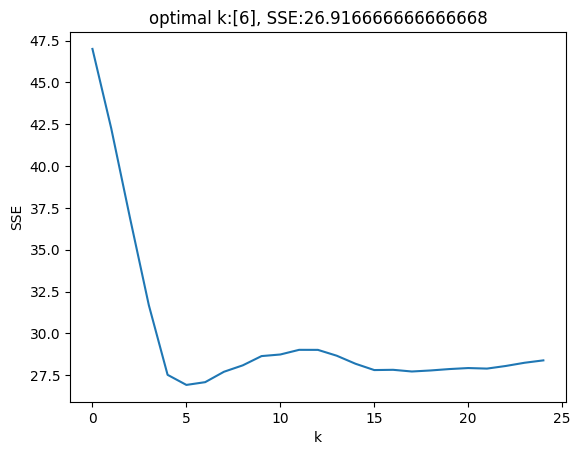

In [14]:
# Q2.7:
# We can use the same process as earlier to determine the optimal k.
k_bar = 25
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

# Again, find the lowest SSE, find the index of it, then use that to find the optimal k value
lowest_SSE = np.min(SSE)
index_of_lowest = np.where(SSE==lowest_SSE)
optimal_k = k_grid[index_of_lowest]
print(optimal_k)

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(optimal_k)+', SSE:'+str(lowest_SSE))
plt.ylabel('SSE')
plt.show()

We can see that the optimal k is 6.

In [15]:
# Q2.8:
# dropping death_event, fixing the model
X = df.drop('DEATH_EVENT',axis=1)

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

[83]


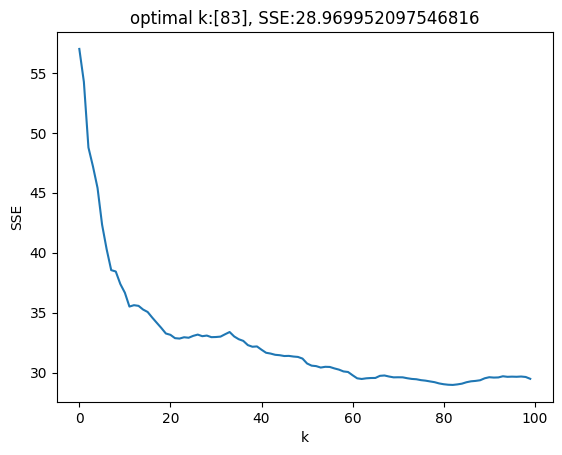

In [16]:
# Now that we have all the variables, we can use the same process to determine the optimal k
k_bar = 100
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Bug in sklearn requires .values

lowest_SSE = np.min(SSE) # highest recorded accuracy
index_of_lowest = np.where(SSE==lowest_SSE)
optimal_k = k_grid[index_of_lowest] # Find the optimal value of k
print(optimal_k)

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(optimal_k)+', SSE:'+str(lowest_SSE))
plt.ylabel('SSE')
plt.show()

We can see that the optimal k is much higher at 83, when we have all our variables. The SSE is also higher, at 29 instead of 27. We can assume that the more variables the model is using, the more complex and worse job it does at predicting than if we were to use fewer variables, like our previous questions. In practice, I would prefer to use the model with fewer variables that more better predict our death_event variable. In this case, more variables are definitely not better.

**Q3.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)